<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Ingestion_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests pandas -q
import requests
import pandas as pd

# Fetch data from Random User Generator API
api_url = "https://randomuser.me/api/?results=10"
response = requests.get(api_url)
data = response.json()

# Convert nested JSON to flat table
df_api = pd.json_normalize(data['results'])

print("Data from REST API:")
print(df_api.head())

Data from REST API:
   gender                         email           phone            cell nat  \
0    male      jairo.rosado@example.com  (643) 356 3557  (699) 547 5413  MX   
1    male    orlando.menard@example.com   079 841 05 59   077 813 06 97  CH   
2  female  zlatomira.kaplun@example.com  (096) D19-9832  (096) K76-1255  UA   
3  female      selin.brunet@example.com   078 406 07 22   075 783 89 30  CH   
4    male  petko.jevremovic@example.com    011-4479-919    060-3193-409  RS   

  name.title name.first   name.last  location.street.number  \
0         Mr      Jairo      Rosado                    5112   
1   Monsieur    Orlando      Menard                    4150   
2       Miss  Zlatomira      Kaplun                    7074   
3     Madame      Selin      Brunet                    6192   
4         Mr      Petko  Jevremović                    3554   

  location.street.name  ...  \
0      Viaducto Tirado  ...   
1   Rue du Bon-Pasteur  ...   
2          Berezhanska  ...   
3 

In [2]:
csv_url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df_csv = pd.read_csv(csv_url)

print("\nData from CSV File:")
print(df_csv.head())


Data from CSV File:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Columns
print("API Data Columns:", df_api.columns.tolist())
print("CSV Data Columns:", df_csv.columns.tolist())

# Info
print("\nAPI Data Info:")
print(df_api.info())

print("\nCSV Data Info:")
print(df_csv.info())


API Data Columns: ['gender', 'email', 'phone', 'cell', 'nat', 'name.title', 'name.first', 'name.last', 'location.street.number', 'location.street.name', 'location.city', 'location.state', 'location.country', 'location.postcode', 'location.coordinates.latitude', 'location.coordinates.longitude', 'location.timezone.offset', 'location.timezone.description', 'login.uuid', 'login.username', 'login.password', 'login.salt', 'login.md5', 'login.sha1', 'login.sha256', 'dob.date', 'dob.age', 'registered.date', 'registered.age', 'id.name', 'id.value', 'picture.large', 'picture.medium', 'picture.thumbnail']
CSV Data Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

API Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   gender                          10 non-null     object
 1   em

/tmp/ipython-input-2056047959.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nationality_counts, x='Nationality', y='Count', palette='viridis')


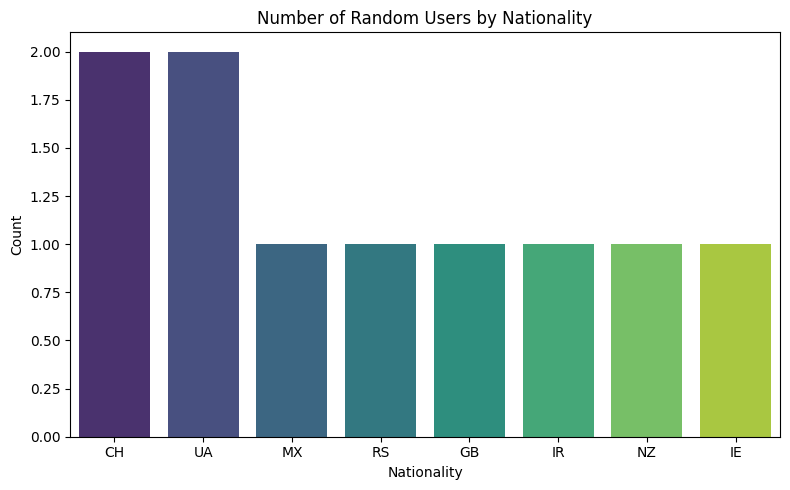

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count number of users by nationality
nationality_counts = df_api['nat'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

# Plot (no FutureWarning)
plt.figure(figsize=(8, 5))
sns.barplot(data=nationality_counts, x='Nationality', y='Count', palette='viridis')
plt.title("Number of Random Users by Nationality")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/tmp/ipython-input-700182238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.index, y=species_counts.values, palette="magma")


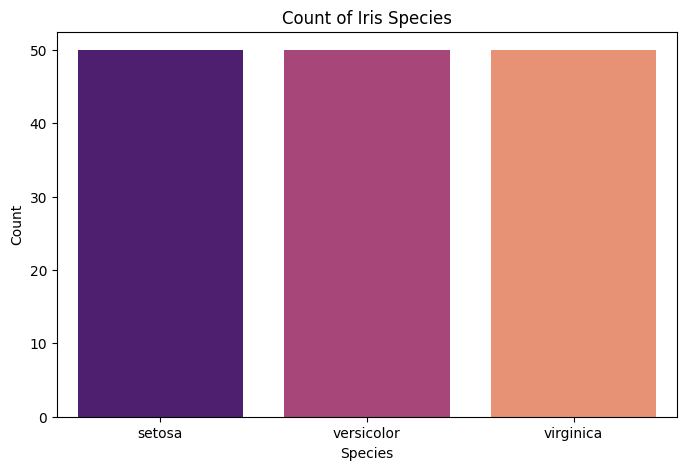

In [5]:
# Count of species
species_counts = df_csv['species'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=species_counts.index, y=species_counts.values, palette="magma")
plt.title("Count of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


 1. What were the main steps for ingesting data from a REST API vs. a CSV?
REST API:

Make an HTTP GET request using the requests library.

Parse the JSON response.

Flatten nested JSON using pandas.json_normalize().

CSV File:

Directly load the file with pandas.read_csv() from a URL or file path.

Data is already structured as a flat table.

Summary:
Both methods load data into a Pandas DataFrame, but REST APIs require transformation from JSON to tabular format, while CSVs are ready-to-use.

 2. What are some possible challenges or error scenarios for each ingestion method?
REST API:

Network issues (e.g., timeouts, 404/500 errors).

API rate limits or auth failures (e.g., expired tokens).

Changes in response structure (e.g., renamed or nested keys).

Inconsistent or deeply nested JSON formats.

CSV:

Broken/missing URL or local file.

Encoding mismatches (e.g., utf-8 vs latin-1).

Irregular file structure (e.g., missing headers, bad delimiters).

Large file size causing memory issues.

Common to both:

Schema mismatches.

Missing or malformed values.

 3. For your workflow, when would you prefer an API vs. a CSV file?
Use an API when:

Data is updated frequently or in real-time.

You want to automate ingestion from a live source.

You need access-controlled or parameterized data feeds.

Use a CSV when:

Working with static, offline datasets.

Reproducibility and easy sharing are more important than freshness.

You’re prototyping or doing quick analysis.

Conclusion:
APIs are ideal for production pipelines that need fresh or dynamic data. CSVs are better for EDA, model prototyping, and reproducible research.